In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# Veri setinin genel özeti
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54706 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   54706 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  0 non-null      float64
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(3)

In [144]:
# Sayısal sütunlar için temel istatistiksel özet
print(df.describe())


            site_id    patient_id      image_id           age        cancer  \
count  54706.000000  54706.000000  5.470600e+04  54706.000000  54706.000000   
mean       1.460407  32698.865262  1.079386e+09     58.544236      0.021168   
std        0.498434  18893.861534  6.183269e+08     10.047491      0.143944   
min        1.000000      5.000000  6.849100e+04     26.000000      0.000000   
25%        1.000000  16481.000000  5.458153e+08     51.000000      0.000000   
50%        1.000000  32432.000000  1.082689e+09     59.000000      0.000000   
75%        2.000000  48999.000000  1.613228e+09     66.000000      0.000000   
max        2.000000  65534.000000  2.147472e+09     89.000000      1.000000   

             biopsy      invasive        BIRADS       implant  density  \
count  54706.000000  54706.000000  54706.000000  54706.000000      0.0   
mean       0.054272      0.014953      0.890615      0.026999      NaN   
std        0.226556      0.121365      0.424534      0.162081     

In [145]:
data.shape

(0, 14)

In [148]:
data.isna().sum()

site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
machine_id                 0
difficult_negative_case    0
dtype: int64

In [155]:
data = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [156]:
missing_values = df.isnull().sum()

# Sadece eksik veri içeren sütunları gösterelim
missing_values = missing_values[missing_values > 0]

print("Eksik Veri Sayıları:")
print(missing_values)



Eksik Veri Sayıları:
density    54706
dtype: int64


In [157]:
print(df.dtypes)


site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                    float64
machine_id                   int64
difficult_negative_case       bool
dtype: object


In [195]:
# 1️⃣ Density sütununu float'a çevir
df["density"] = pd.to_numeric(df["density"], errors="coerce")

# 2️⃣ Eksik verileri doldur
df["age"] = df["age"].fillna(df["age"].median())
df["BIRADS"] = df["BIRADS"].fillna(df["BIRADS"].mode()[0])
df["density"] = df["density"].fillna(df["density"].mean())

# 3️⃣ Kontrol: Eksik veri kaldı mı?
print(df.isnull().sum())


site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                         0
implant                        0
density                    54706
machine_id                     0
difficult_negative_case        0
dtype: int64


In [200]:
# Eksik verileri kontrol et
print(df.isnull().sum())  # Her sütundaki eksik değerlerin sayısını göster


site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                         0
implant                        0
density                    54706
machine_id                     0
difficult_negative_case        0
dtype: int64


In [159]:
# Kategorik sütunların dağılımlarını görmek için
print(df['BIRADS'].value_counts())


BIRADS
1.0    44192
0.0     8249
2.0     2265
Name: count, dtype: int64


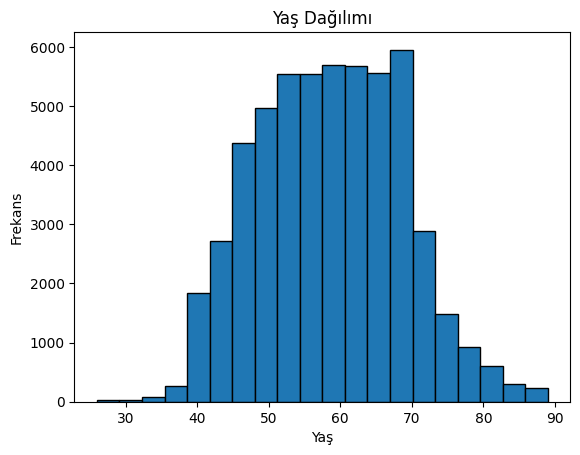

In [161]:
# Yaş dağılımını görselleştirelim
import matplotlib.pyplot as plt

plt.hist(df['age'].dropna(), bins=20, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()


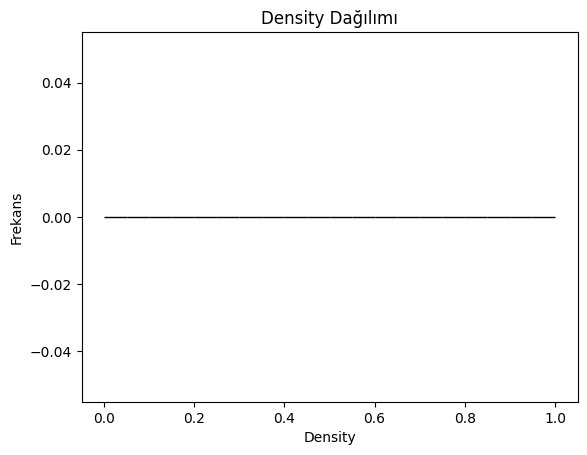

In [168]:
# Density dağılımı
plt.hist(df['density'].dropna(), bins=20, edgecolor='black')
plt.title('Density Dağılımı')
plt.xlabel('Density')
plt.ylabel('Frekans')
plt.show()


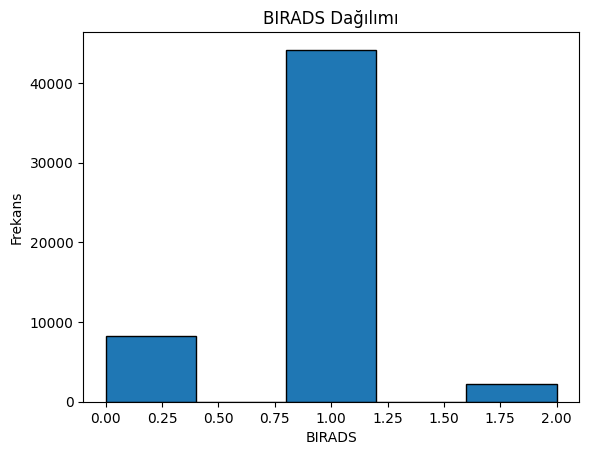

In [169]:
# BIRADS dağılımı (sayısal olduğu varsayılıyor)
plt.hist(df['BIRADS'].dropna(), bins=5, edgecolor='black')
plt.title('BIRADS Dağılımı')
plt.xlabel('BIRADS')
plt.ylabel('Frekans')
plt.show()


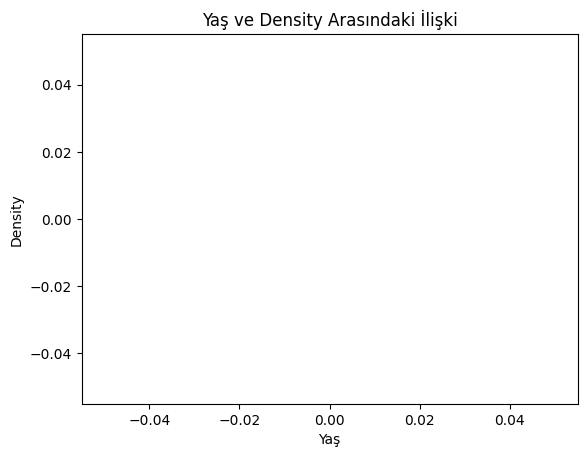

In [170]:
# Yaş ve Density arasındaki ilişkiyi scatter plot ile gösterelim
plt.scatter(df['age'], df['density'])
plt.title('Yaş ve Density Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('Density')
plt.show()


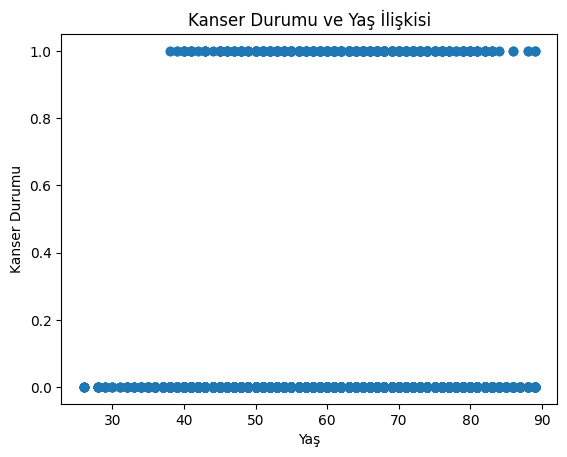

In [171]:
# Kanser durumu ile yaş arasındaki ilişkiyi gösterelim
plt.scatter(df['age'], df['cancer'])
plt.title('Kanser Durumu ve Yaş İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Kanser Durumu')
plt.show()


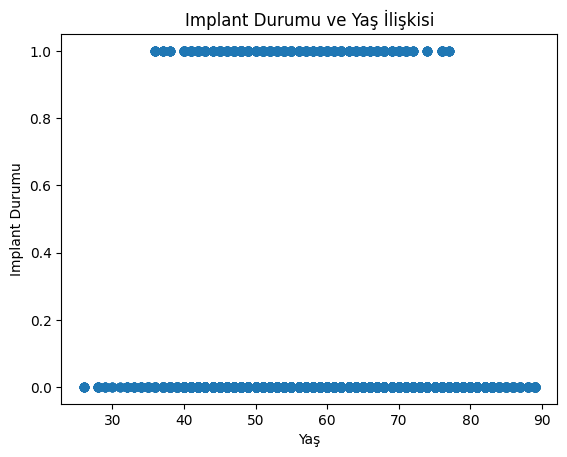

In [172]:
# Implant durumu ve yaş arasındaki ilişkiyi scatter plot ile gösterelim
plt.scatter(df['age'], df['implant'])
plt.title('Implant Durumu ve Yaş İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Implant Durumu')
plt.show()


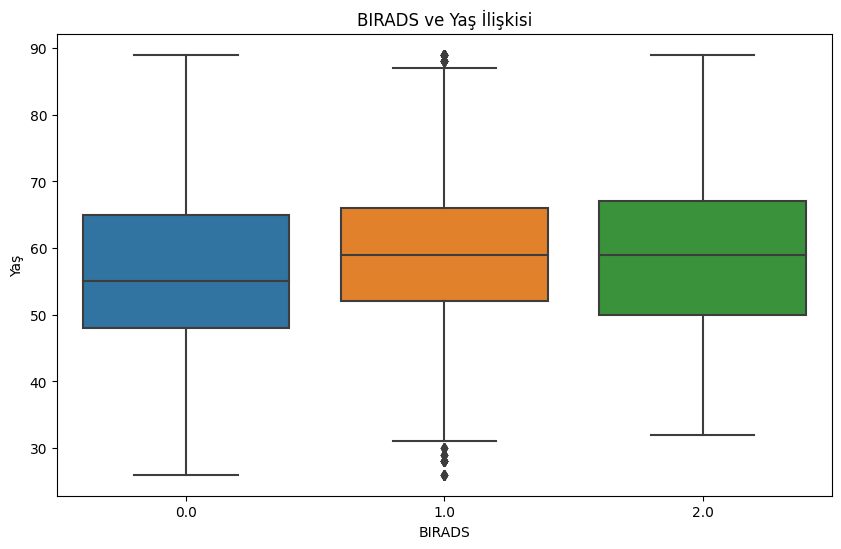

In [173]:
# BIRADS'a göre yaş dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BIRADS'], y=df['age'])
plt.title('BIRADS ve Yaş İlişkisi')
plt.xlabel('BIRADS')
plt.ylabel('Yaş')
plt.show()


In [162]:
# Cancer ve Biopsy sütunlarının dağılımı
print(df['cancer'].value_counts())
print(df['biopsy'].value_counts())


cancer
0    53548
1     1158
Name: count, dtype: int64
biopsy
0    51737
1     2969
Name: count, dtype: int64


In [163]:
# Implant ve Difficult Negative Case sütunlarının dağılımı
print(df['implant'].value_counts())
print(df['difficult_negative_case'].value_counts())


implant
0    53229
1     1477
Name: count, dtype: int64
difficult_negative_case
False    47001
True      7705
Name: count, dtype: int64


In [177]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding: Kategorik sütunları sayısala çevir
label_encoder = LabelEncoder()

# Kategorik sütunları encode edelim
df['laterality'] = label_encoder.fit_transform(df['laterality'].astype(str))
df['view'] = label_encoder.fit_transform(df['view'].astype(str))
df['BIRADS'] = label_encoder.fit_transform(df['BIRADS'].astype(str))
df['implant'] = label_encoder.fit_transform(df['implant'].astype(str))

# Görüntüle
print(df.head())


   site_id  patient_id    image_id  laterality  view   age  cancer  biopsy  \
0        2       10006   462822612           0     1  61.0       0       0   
1        2       10006  1459541791           0     5  61.0       0       0   
2        2       10006  1864590858           1     5  61.0       0       0   
3        2       10006  1874946579           1     1  61.0       0       0   
4        2       10011   220375232           0     1  55.0       0       0   

   invasive  BIRADS  implant  density  machine_id  difficult_negative_case  
0         0       1        0      NaN          29                    False  
1         0       1        0      NaN          29                    False  
2         0       1        0      NaN          29                    False  
3         0       1        0      NaN          29                    False  
4         0       0        0      NaN          21                     True  


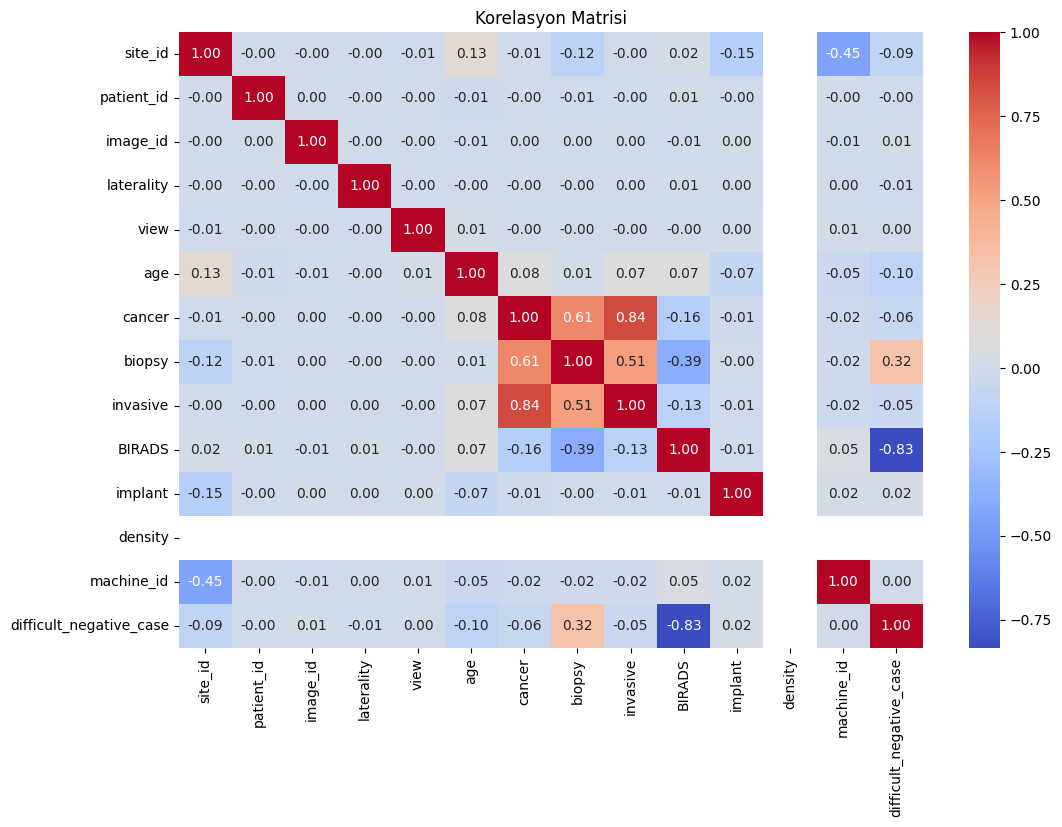

In [181]:
# Korelasyon matrisini hesaplayalım
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirelim
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()


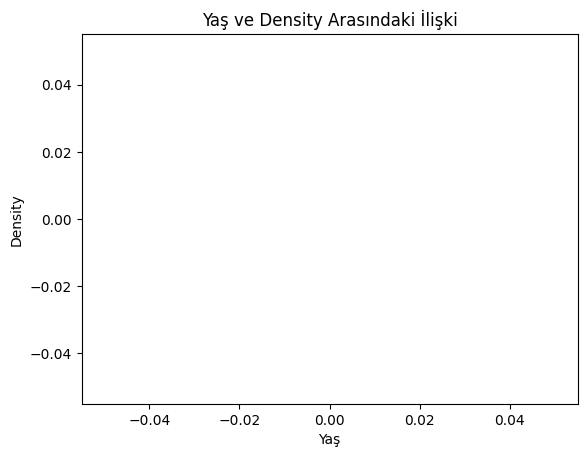

In [165]:
# Yaş ve Density arasındaki ilişkiyi görselleştirelim
plt.scatter(df['age'], df['density'])
plt.title('Yaş ve Density Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('Density')
plt.show()


In [166]:
# Sütunlardaki benzersiz değerleri görmek
print(df['view'].unique())  # Örneğin 'view' sütunundaki benzersiz değerler
print(df['laterality'].unique())  # 'laterality' sütunundaki benzersiz değerler


['CC' 'MLO' 'ML' 'LM' 'AT' 'LMO']
['L' 'R']


In [ ]:
# BIRADS'a göre ortalama yaş
print(df.groupby('BIRADS')['age'].mean())


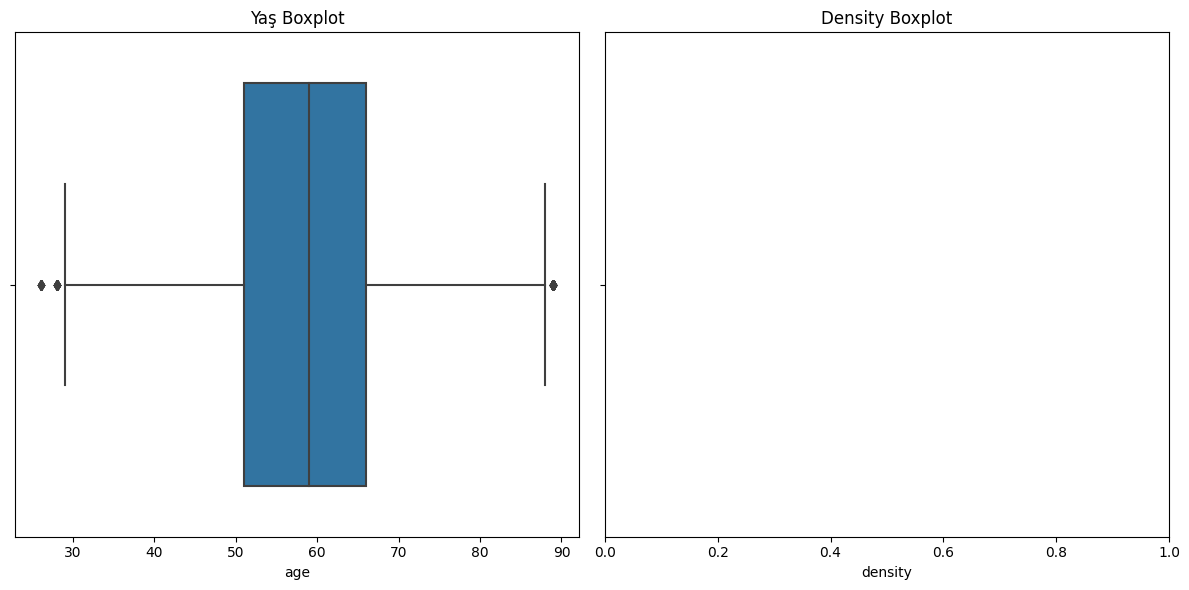

In [167]:
# Yaş ve Density için boxplot çizelim
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['age'])
plt.title('Yaş Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['density'])
plt.title('Density Boxplot')

plt.tight_layout()
plt.show()
